# Pandas 基礎用法

安裝：  
    !pip install pandas

## Pandas 提供的資料結構
1.Series：用來處理時間序列相關的資料(如感測器資料等)，主要為建立索引的一維陣列。  
2.DataFrame：用來處理結構化(Table like)的資料，有列索引與欄標籤的二維資料集，例如關聯式資料庫、CSV 等等。  
3.Panel：用來處理有資料及索引、列索引與欄標籤的三維資料集。  

![](https://github.com/jiangsir/Images/raw/master/pandas_row_column.png)

![](https://github.com/jiangsir/Images/raw/master/pandas_dataframe.svg)

In [29]:
'''
建立一個 Series

將一個普通的 list 轉為 Series
'''
import pandas as pd

ls = ['蘋果', '香蕉', '鳳梨', '芒果', '橘子']
print(ls[0])
series = pd.Series(ls)

series.head()

蘋果


0    蘋果
1    香蕉
2    鳳梨
3    芒果
4    橘子
dtype: object

In [13]:
'''
指定 index ，不使用 0 ~ 4
'''

import pandas as pd

ls = ['蘋果', '香蕉', '鳳梨', '芒果', '橘子']
series = pd.Series(ls, index=['a', 'b', 'c', 'd', 'e'])

series.head()

a    蘋果
b    香蕉
c    鳳梨
d    芒果
e    橘子
dtype: object

In [14]:
'''
由 dict 來創建 Series
'''
import pandas as pd
dict = {'a':'蘋果', 'b':'香蕉', 'c':'鳳梨', 'd':'芒果', 'e':'橘子'}
se = pd.Series(dict, index=dict.keys())
display(se.head())

'''
取得 Series 裡的一筆資料
'''
print(se['a'])

'''
取得 Series 裡的幾筆資料。可以透過一個 list 來指定所需要的 key。
'''
print(se[['a', 'e']])

'''
取得 Series 裡的幾筆資料。也可以透過序號來取得。
'''
print(se[[0, 2, 4]])

'''
子字串的切片方式
'''
print(se[0:2])
print(se[2:])
print(se['d':])


a    蘋果
b    香蕉
c    鳳梨
d    芒果
e    橘子
dtype: object

蘋果
a    蘋果
e    橘子
dtype: object
a    蘋果
c    鳳梨
e    橘子
dtype: object
a    蘋果
b    香蕉
dtype: object
c    鳳梨
d    芒果
e    橘子
dtype: object
d    芒果
e    橘子
dtype: object


In [15]:
import pandas as pd
scores = pd.Series({'小明':90, '小華':80, '小李':70, '小強':55})
#簡單的運算
print('列出布林值：')
print(scores > 60)

print('列出及格的人：')
print(scores[scores > 60])

print('列出 60 ~ 90 分的人：')
print((scores>60) & (scores<90))
print(scores[(scores>60) & (scores<90)])

print('直接調整分數：')
new_scores = scores**0.5*10
print(new_scores)

列出布林值：
小明     True
小華     True
小李     True
小強    False
dtype: bool
列出及格的人：
小明    90
小華    80
小李    70
dtype: int64
列出 60 ~ 90 分的人：
小明    False
小華     True
小李     True
小強    False
dtype: bool
小華    80
小李    70
dtype: int64
直接調整分數：
小明    94.868330
小華    89.442719
小李    83.666003
小強    74.161985
dtype: float64


### 用 dict 建立一個 DataFrame

column base

In [16]:
import pandas as pd

dict = {'水果': ['蘋果', '鳳梨', '芒果'], 
        '價格': [10, 15, 20]
}

df = pd.DataFrame(dict)
print('index values=', df.index.values)
print('columns values=', df.columns.values)
display(df.head())

index values= [0 1 2]
columns values= ['水果' '價格']


,水果,價格
0,蘋果,10
1,鳳梨,15
2,芒果,20


In [11]:
import pandas as pd

dict = {'日期':['5/10', '5/11', '5/12'],
    '水果': ['蘋果', '鳳梨', '芒果'], 
        '價格': [10, 15, 20]
}

df = pd.DataFrame(dict)
df.set_index("日期" , inplace=True)
print('index values=', df.index.values)
print('columns values=', df.columns.values)
display(df.head())

index values= ['5/10' '5/11' '5/12']
columns values= ['水果' '價格']


,水果,價格
日期,,
5/10,蘋果,10
5/11,鳳梨,15
5/12,芒果,20


In [17]:
import pandas as pd

ls = ['蘋果', '鳳梨', '芒果']
df = pd.DataFrame(ls)
df.head()

,0
0,蘋果
1,鳳梨
2,芒果


## 從 二維 list 創建一個 DataFrame


In [18]:
'''
從 二維 list 創建一個 DataFrame
'''

import pandas as pd

matrix = [["Movies", 46],["Sports", 8], ["Coding", 12], ["Fishing",12], ["Dancing",6], ["cooking",8]]

'''
由 DataFrame columns 指定欄位名稱。
'''
df = pd.DataFrame(matrix, columns = ["name", "num"]) # 指定欄標籤名稱  
df

,name,num
0,Movies,46
1,Sports,8
2,Coding,12
3,Fishing,12
4,Dancing,6
5,cooking,8


In [19]:
'''
DataFrame 的相關操作。
'''
print(df.shape) # 回傳列數與欄數  
print("---")  
print(df.describe()) # 回傳描述性統計  
print("---")  
print(df.head(3)) # 回傳前三筆觀測值  
print("---")  
print(df.tail(3)) # 回傳後三筆觀測值  
print("---")  
print(df.columns) # 回傳欄位名稱  
print("---")  
print(df.index) # 回傳 index  
print("---")  
print(df.info) # 回傳資料內容  

(6, 2)
---
             num
count   6.000000
mean   15.333333
std    15.214029
min     6.000000
25%     8.000000
50%    10.000000
75%    12.000000
max    46.000000
---
     name  num
0  Movies   46
1  Sports    8
2  Coding   12
---
      name  num
3  Fishing   12
4  Dancing    6
5  cooking    8
---
Index(['name', 'num'], dtype='object')
---
RangeIndex(start=0, stop=6, step=1)
---
<bound method DataFrame.info of       name  num
0   Movies   46
1   Sports    8
2   Coding   12
3  Fishing   12
4  Dancing    6
5  cooking    8>


## ❖ 資料選擇與篩選
可以透過下列方法選擇元素

中括號 [] 選擇元素  
. 將變數當作屬性選擇  
.loc .iloc 方法選擇  
使用布林值篩選  

In [20]:
# Pandas 透過使用中括號 [] 與 .iloc 可以很靈活地從 data frame 中選擇想要的元素
# Python 在指定 0:1 時不包含 1，在指定 0:2 時不包含 2

import pandas as pd

groups = ["Movies", "Sports", "Coding", "Fishing", "Dancing", "cooking"]  
num = [46, 8, 12, 12, 6, 58]

dict = {"groups": groups,  
        "num": num
       }

select_df = pd.DataFrame(dict)

print(select_df.iloc[0, 1]) # 第一列第二欄：組的人數  
print("---")  
print(select_df.iloc[0:1,:]) # 第一列：組的組名與人數  
print("---")  
print(select_df.iloc[:,1]) # 第二欄：各組的人數  
print("---")  
print(select_df["num"]) # 各組的人數  
print("---")  
print(select_df.num) # 各組的人數  

46
---
   groups  num
0  Movies   46
---
0    46
1     8
2    12
3    12
4     6
5    58
Name: num, dtype: int64
---
0    46
1     8
2    12
3    12
4     6
5    58
Name: num, dtype: int64
---
0    46
1     8
2    12
3    12
4     6
5    58
Name: num, dtype: int64


## 使用布林值來篩選。


In [21]:
'''
使用布林值來篩選。
'''

import pandas as pd

groups = ["Movies", "Sports", "Coding", "Fishing", "Dancing", "cooking"]  
num = [46, 8, 12, 12, 6, 58]

dict = {"groups": groups,  
        "num": num
        }

select_df = pd.DataFrame(dict)

out_df = select_df[select_df.loc[:,"num"] > 10] # 選出人數超過 10 的群組  
print(out_df)  

groups  num
0   Movies   46
2   Coding   12
3  Fishing   12
5  cooking   58


## 資料排序
可以使用的方法如下：

.sort_index()  
.sort_values()  

In [22]:
import pandas as pd # 引用套件並縮寫為 pd

groups = ["Movies", "Sports", "Coding", "Fishing", "Dancing", "cooking"]  
num = [46, 8, 12, 12, 6, 58]

dict = {"groups": groups,  
        "num": num
        }
select_df = pd.DataFrame(dict)

select_df.sort_index(axis = 0, ascending = True) # 透過索引值做排序，axis 可以指定第幾欄，ascending 用於設定升冪或降密  

,groups,num
0,Movies,46
1,Sports,8
2,Coding,12
3,Fishing,12
4,Dancing,6
5,cooking,58


In [23]:
import pandas as pd # 引用套件並縮寫為 pd

groups = ["Movies", "Sports", "Coding", "Fishing", "Dancing", "cooking"]  
num = [46, 8, 12, 12, 6, 58]

dict = {"groups": groups,  
        "num": num
        }
select_df = pd.DataFrame(dict)

select_df.sort_values(by = 'num') #透過指定欄位的數值排序  

,groups,num
4,Dancing,6
1,Sports,8
2,Coding,12
3,Fishing,12
0,Movies,46
5,cooking,58


## DataFrame 處理遺漏值

❖ 判斷是否為空值  
可以使用下列兩種方法來判斷：

isnull()  
notnull()

In [24]:
# 讀取 CSV File
import pandas as pd # 引用套件並縮寫為 pd  
df = pd.read_csv('shop_list2.csv')  
print(df)

# 讀取後放入 DataFrame
select_df = pd.DataFrame(df)

print(select_df.ix[:, "shop name"].isnull()) # 判斷哪些店名是遺失值  
print("---")  
print(select_df.ix[:, "maket size"].notnull()) # 判斷哪些市場規模不是遺失值

# 可以透過 ix 方法（利用索引值或欄位）選擇 data frame 區段

FileNotFoundError: [Errno 2] File shop_list2.csv does not exist: 'shop_list2.csv'

## ❖ 處理空值

可以使用下列兩種方法來填補空值：

dropna()  
fillna()

In [25]:
# 讀取 CSV File
import pandas as pd # 引用套件並縮寫為 pd  
df = pd.read_csv('shop_list2.csv')  
print(df)

# 讀取後放入 DataFrame
select_df = pd.DataFrame(df)

drop_value = select_df.dropna() # 有遺失值的觀測值都刪除  
print(drop_value)  
print("---")  
filled_value = select_df.fillna(0) # 有遺失值的觀測值填補 0  
print(filled_value)  
print("---")  
filled_value_column = select_df.fillna({"shop name": "NULL", "maket size": 0}) # 依欄位填補遺失值  
print(filled_value_column)  

FileNotFoundError: [Errno 2] File shop_list2.csv does not exist: 'shop_list2.csv'

## 直接讀取 CSV URL 並轉爲一個 DataFrame

In [28]:
import pandas as pd
df = pd.read_csv('http://stats.moe.gov.tw/files/school/106/u1_new.csv')
df.head()

,代碼,學校名稱,公/私立,縣市名稱,地址,電話,網址,體系別
0,1,國立政治大學,公立,[38]臺北市,[116]臺北市文山區指南路二段64號,(02)29393091,http://www.nccu.edu.tw,[1]一般
1,2,國立清華大學,公立,[18]新竹市,[300]新竹市東區光復路二段101號,(03)5715131,http://www.nthu.edu.tw,[1]一般
2,3,國立臺灣大學,公立,[33]臺北市,[106]臺北市大安區羅斯福路四段1號,(02)33663366,http://www.ntu.edu.tw,[1]一般
3,4,國立臺灣師範大學,公立,[33]臺北市,[106]臺北市大安區和平東路一段162號,(02)77341111,http://www.ntnu.edu.tw,[3]師範
4,5,國立成功大學,公立,[21]臺南市,[701]臺南市東區大學路1號,(06)2757575,http://www.ncku.edu.tw,[1]一般


### 讀取 CSV 的下載網址

In [27]:

df = pd.read_csv('https://quality.data.gov.tw/dq_download_csv.php?nid=5948&md5_url=17f17b629941c66e38783dbecc906c66')
df.head()

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate chain too long (_ssl.c:1108)>

### 讀取本地檔案

In [11]:
import pandas as pd
import os
df2 = pd.read_csv(os.path.join('datas', 'NewTaipeiCify_YouBike_0004306885361123478933.csv'))
df2.head()

,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act
0,1001,大鵬華城,38,11,新店區,20180719111824,24.991160,121.533980,新北市新店區中正路700巷3號,Xindian Dist.,Dapeng Community,"No. 3, Lane 700 Chung Cheng Road, Xindian Dist...",27,1
1,1002,汐止火車站,56,18,汐止區,20180719111818,25.068914,121.662748,南昌街/新昌路口(西側廣場),Xizhi Dist.,Xizhi Railway Station,Nanchang St./Xinchang Rd.,38,1
2,1003,汐止區公所,46,24,汐止區,20180719111844,25.064162,121.658301,新台五路一段/仁愛路口(新台五路側汐止地政事務所前機車停車場),Xizhi Dist.,Xizhi Dist. Office,"Sec. 1, Xintai 5th Rd./Ren’ai Rd.",22,1
3,1004,國泰綜合醫院,56,17,汐止區,20180719111841,25.073150,121.662555,建成路78號對面停車場,Xizhi Dist.,Cathay General Hospital,"No78, Jiancheng Rd",38,1
4,1005,裕隆公園,40,15,新店區,20180719111819,24.979649,121.546319,寶中路/品牌路口(東南側),Xindian Dist.,Yulon Park,Baozhong Rd./,25,1


In [7]:
!pip3 install xlwt
!pip3 install openpyxl
!pip3 install xlrd
!pip install xlwt
!pip install openpyxl
!pip install xlrd


You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.


### 從 CSV 讀取資料，並取出所需要的欄位，並另存成一個 excel 檔。

```
DataFrame.loc[取得 rows , 取得coloums]

用 index 取得 rows 以及 columns
DataFrame.iloc[:, [1,3,5]] 
DataFrame.iloc[:, [1:5]]

```

In [11]:
import pandas as pd
import os
df = pd.read_csv(os.path.join('datas','NewTaipeiCify_YouBike_0004306885361123478933.csv'))
x = df.loc[:,['sna','bemp','sarea', 'lat', 'lng']]
x.to_excel(os.path.join('datas', 'youbike.xlsx'))
display(x.head(10))
print(type(x))

,sna,bemp,sarea,lat,lng
0,大鵬華城,27,新店區,24.991160,121.533980
1,汐止火車站,38,汐止區,25.068914,121.662748
2,汐止區公所,22,汐止區,25.064162,121.658301
3,國泰綜合醫院,38,汐止區,25.073150,121.662555
4,裕隆公園,25,新店區,24.979649,121.546319
5,捷運大坪林站(3號出口),16,新店區,24.983977,121.541721
6,汐科火車站(北),17,汐止區,25.064106,121.653019
7,興華公園,22,三重區,25.060125,121.483101
8,三重國民運動中心,51,三重區,25.054391,121.488489
9,捷運三重站(3號出口),32,三重區,25.055883,121.484739


<class 'pandas.core.frame.DataFrame'>


### 讀取一個 excel 檔並預覽。

In [12]:
import os
y = pd.read_excel(os.path.join('datas', 'youbike.xlsx'))
y.head()

,Unnamed: 0,sna,bemp,sarea,lat,lng
0,0,大鵬華城,27,新店區,24.991160,121.533980
1,1,汐止火車站,38,汐止區,25.068914,121.662748
2,2,汐止區公所,22,汐止區,25.064162,121.658301
3,3,國泰綜合醫院,38,汐止區,25.073150,121.662555
4,4,裕隆公園,25,新店區,24.979649,121.546319


### 取出想要的欄位之後，再自訂欄位名稱

In [13]:
import pandas as pd
import os
df = pd.read_csv(os.path.join('datas', 'NewTaipeiCify_YouBike_0004306885361123478933.csv'))
x = df.loc[:,['sna','bemp','sarea', 'lat', 'lng']]
x.columns = ['站名', '可借車位數', '行政區', '經度', '緯度']
x.to_excel(os.path.join('datas', 'youbike.xlsx'))
print(type(x))
x.head()


<class 'pandas.core.frame.DataFrame'>


,站名,可借車位數,行政區,經度,緯度
0,大鵬華城,27,新店區,24.991160,121.533980
1,汐止火車站,38,汐止區,25.068914,121.662748
2,汐止區公所,22,汐止區,25.064162,121.658301
3,國泰綜合醫院,38,汐止區,25.073150,121.662555
4,裕隆公園,25,新店區,24.979649,121.546319


,日期,測站,測項,0,1,2,3,4,5,6,...,15,16,17,18,19,20,21,22,23,平均
0,2017/05/01,沙鹿,RAINFALL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017/05/02,沙鹿,RAINFALL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017/05/03,沙鹿,RAINFALL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017/05/04,沙鹿,RAINFALL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017/05/05,沙鹿,RAINFALL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


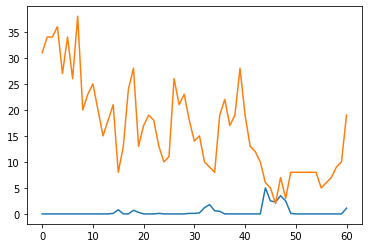

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
dfrf = pd.read_csv(os.path.join('datas', '20170506_rainfall.csv'))
dfpm = pd.read_csv(os.path.join('datas', '20170506_pm25.csv'))

#rf = dfrf.iloc[:,[0,1,27]]
#pm = dfpm.iloc[:,[0,1,27]]

dfrf.平均.plot()
dfpm.平均.plot()
# 藍色： ranfall
# 橘色: pm2.5
dfrf.head()

,日期,測站,測項,00,01,02,03,04,05,06,...,16,17,18,19,20,21,22,23,sum,avg
0,2017/01/01,沙鹿,RAINFALL,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1,2017/01/02,沙鹿,RAINFALL,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,2017/01/03,沙鹿,RAINFALL,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,2017/01/04,沙鹿,RAINFALL,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,2017/01/05,沙鹿,RAINFALL,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


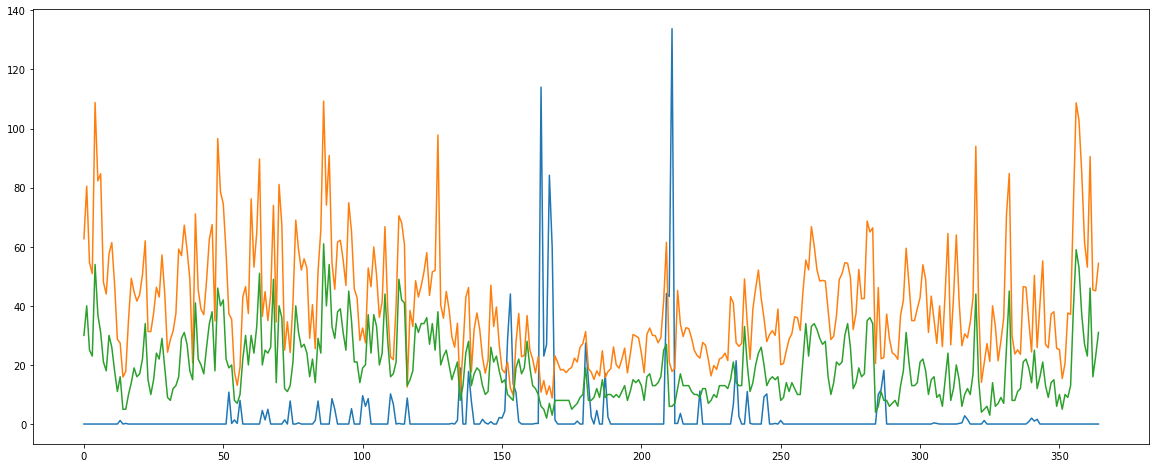

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.figure(figsize=(20,8))
dfrf = pd.read_csv(os.path.join('datas', '2017_rainfall.csv'))
dfpm25 = pd.read_csv(os.path.join('datas', '2017_pm25.csv'))
dfpm10 = pd.read_csv(os.path.join('datas', '2017_pm10.csv'))

dfrf['sum'].plot()
dfpm10.avg.plot()
dfpm25.avg.plot()
# 橘色 pm2.5
# 綠色 pm10
dfrf.head()

,日期,測站,測項,00,01,02,03,04,05,06,...,17,18,19,20,21,22,23,sum,avg,summ
0,2017/01/01,沙鹿,RAINFALL,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1,2017/01/02,沙鹿,RAINFALL,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2,2017/01/03,沙鹿,RAINFALL,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,2017/01/04,沙鹿,RAINFALL,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
4,2017/01/05,沙鹿,RAINFALL,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0


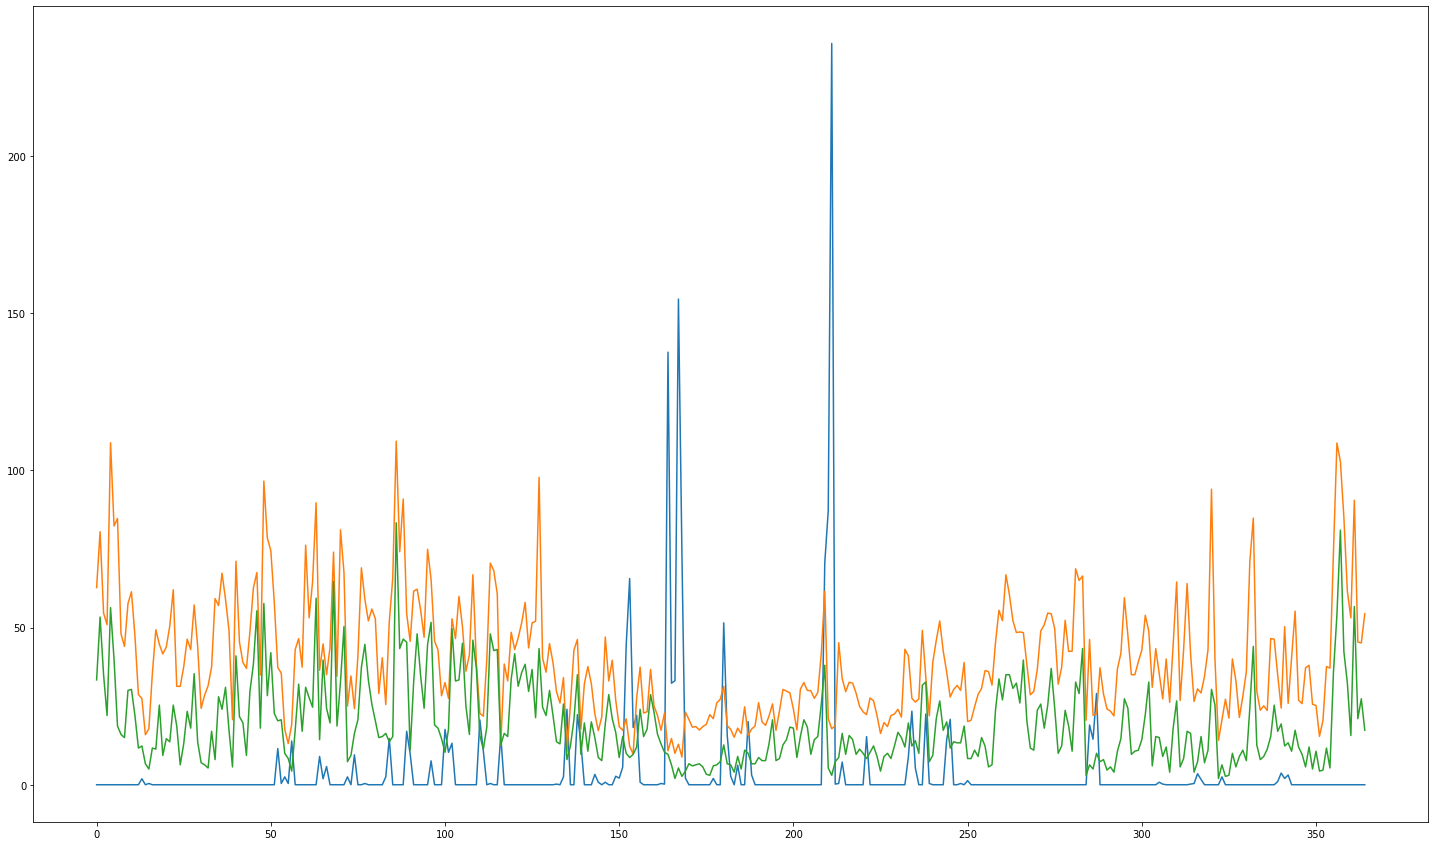

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.figure(figsize=(25,15))
dfrf = pd.read_csv(os.path.join('datas', '2017_rainfall.csv'))
dfpm25 = pd.read_csv(os.path.join('datas', '2017_pm25.csv'))
dfpm10 = pd.read_csv(os.path.join('datas', '2017_pm10.csv'))

dfrf['summ'] = dfrf.sum(axis=1)
dfpm25['mean'] = dfpm25.mean(axis=1)
dfpm10['mean'] = dfpm10.mean(axis=1)

dfrf['summ'].plot()
dfpm10['mean'].plot()
dfpm25['mean'].plot()
# 橘色 pm2.5
# 綠色 pm10
dfrf.head()

,日期,測站,測項,00,01,02,03,04,05,06,...,17,18,19,20,21,22,23,sum,avg,mean
91,2017/04/02,沙鹿,RAINFALL,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
92,2017/04/03,沙鹿,RAINFALL,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
93,2017/04/04,沙鹿,RAINFALL,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
94,2017/04/05,沙鹿,RAINFALL,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
95,2017/04/06,沙鹿,RAINFALL,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0


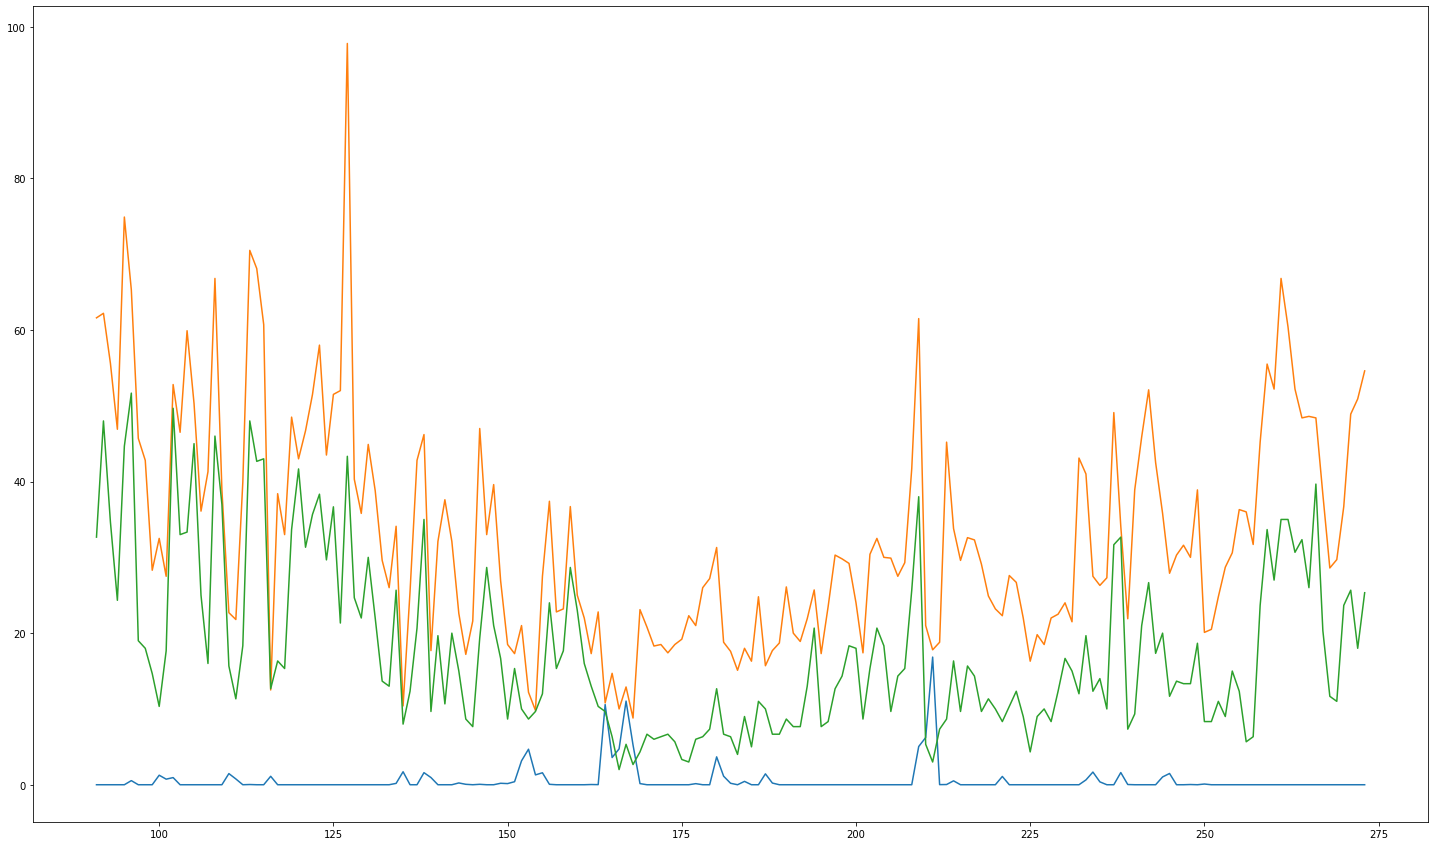

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import os

plt.figure(figsize=(25,15))
dfrf = pd.read_csv(os.path.join('datas', '2017_rainfall.csv'))
dfpm25 = pd.read_csv(os.path.join('datas', '2017_pm25.csv'))
dfpm10 = pd.read_csv(os.path.join('datas', '2017_pm10.csv'))


startdate = '2017/04/01'
enddate = '2017/10/01'
dfrf = dfrf.loc[(dfrf['日期'] > startdate) & (dfrf['日期'] <= enddate)]
dfpm25 = dfpm25.loc[(dfpm25['日期'] > startdate) & (dfpm25['日期'] <= enddate)]
dfpm10 = dfpm10.loc[(dfpm10['日期'] > startdate) & (dfpm10['日期'] <= enddate)]

dfrf['mean'] = dfrf.mean(axis=1)
dfpm25['mean'] = dfpm25.mean(axis=1)
dfpm10['mean'] = dfpm10.mean(axis=1)


dfrf['mean'].plot()
dfpm10['mean'].plot()
dfpm25['mean'].plot()
# 橘色 pm2.5
# 綠色 pm10
dfrf.head()

,日期,測站,測項,0,1,2,3,4,5,6,...,15,16,17,18,19,20,21,22,23,mean
91,2017/04/02,南投,RAINFALL,0.0,0,0.0,0.0,0,0.0,0.0,...,0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0
92,2017/04/03,南投,RAINFALL,0.0,0,0.0,0.0,0,0.0,0.0,...,0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0
93,2017/04/04,南投,RAINFALL,0.0,0,0.0,0.0,0,0.0,0.0,...,0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0
94,2017/04/05,南投,RAINFALL,0.0,0,0.0,0.0,0,0.0,0.0,...,0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0
95,2017/04/06,南投,RAINFALL,0.0,0,0.0,0.0,0,0.0,0.0,...,0,0.0,0,0.0,0.0,0,0,0.0,0.0,0.0


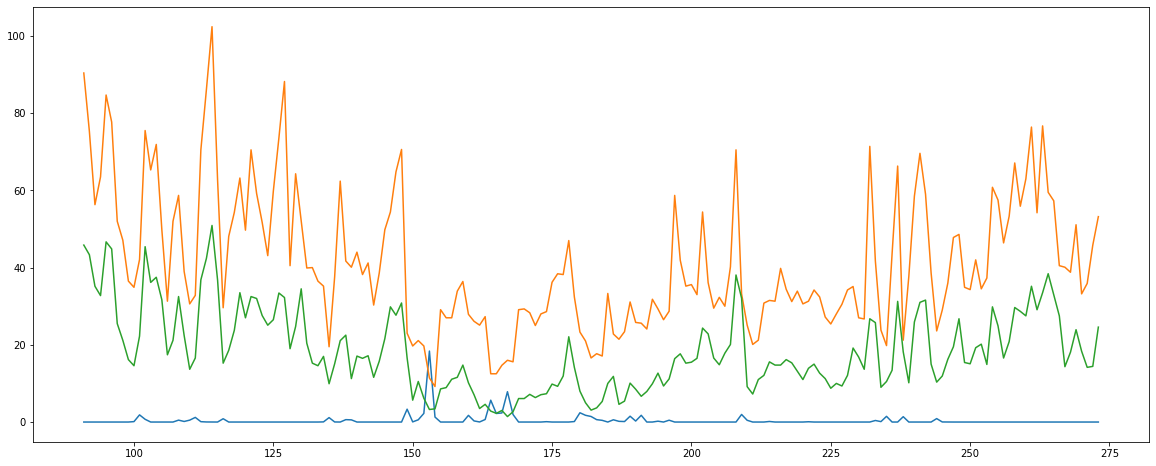

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
plt.figure(figsize=(20,8))

dfrf = pd.read_csv(os.path.join('datas', '2017_nantou_rainfall.csv'))
dfpm25 = pd.read_csv(os.path.join('datas', '2017_nantou_pm25.csv'))
dfpm10 = pd.read_csv(os.path.join('datas', '2017_nantou_pm10.csv'))

startdate = '2017/04/01'
enddate = '2017/10/01'
dfrf = dfrf.loc[(dfrf['日期'] > startdate) & (dfrf['日期'] <= enddate)]
dfpm25 = dfpm25.loc[(dfpm25['日期'] > startdate) & (dfpm25['日期'] <= enddate)]
dfpm10 = dfpm10.loc[(dfpm10['日期'] > startdate) & (dfpm10['日期'] <= enddate)]

dfrf['mean'] = dfrf.mean(axis=1)
dfpm25['mean'] = dfpm25.mean(axis=1) 
dfpm10['mean'] = dfpm10.mean(axis=1)

dfrf['mean'].plot()
dfpm10['mean'].plot()
dfpm25['mean'].plot()
dfrf.head()

## 取得交通事故對照表

https://data.taipei/#/dataset/detail?id=2f238b4f-1b27-4085-93e9-d684ef0e2735



In [3]:
import requests, os

filename = os.path.join('datas', '107年-臺北市A1及A2類交通事故明細.csv') 
res = requests.get('https://data.taipei/api/getDatasetInfo/downloadResource?id=2f238b4f-1b27-4085-93e9-d684ef0e2735&rid=ea731a84-e4a1-4523-b981-b733beddbc1f')
with open(filename, 'wb') as f:
    f.write(res.content)

df = pd.read_csv(filename, encoding='big5')
df.head()

,發生年,發生月,發生日,發生時,發生分,處理別,區序,肇事地點,死亡人數,受傷人數,當事人序,車種,性別,年齡,受傷程度,4天候,7速限,8道路型態,9事故位置
0,107,3,29,15,54,2,01大同區,大同區民權西路108號,0,1,1,B03,2,41.0,3.0,8,50,14.0,9.0
1,107,3,29,15,54,2,01大同區,大同區民權西路108號,0,1,2,C03,2,58.0,2.0,8,50,14.0,9.0
2,107,1,7,17,42,2,01大同區,大同區重慶北路2段與南京西路口,0,1,1,B01,1,59.0,3.0,6,40,4.0,2.0
3,107,1,7,17,42,2,01大同區,大同區重慶北路3段與南京西路口,0,1,2,C03,1,18.0,2.0,6,40,4.0,2.0
4,107,1,14,9,56,2,01大同區,大同區承德路3段與民族西路口,0,1,1,C03,1,20.0,2.0,8,50,4.0,1.0


In [68]:
import pandas as pd
import requests, os

# 你可以用類似的方式爬取任何網路上的公開數據集

filename = os.path.join('datas', '107年-臺北市A1及A2類交通事故明細.csv') 
df_raw = pd.read_csv(filename, encoding='big5')

# 複製一份做處理
df = df_raw.copy()

# 計算不同區不同性別的死亡、受傷人數
df = (df[df['性別'].isin([1, 2])]
      .groupby(['區序', '性別'])[['死亡人數', '受傷人數']]
      .sum()
      .reset_index()
      .sort_values('受傷人數'))

df['性別'] = df['性別'].apply(lambda x: '男性' if x == 1 else '女性')
df = df.reset_index().drop('index', axis=1)

# 顯示結果
display(df_raw.head())
display(df.head())

,發生年,發生月,發生日,發生時,發生分,處理別,區序,肇事地點,死亡人數,受傷人數,當事人序,車種,性別,年齡,受傷程度,4天候,7速限,8道路型態,9事故位置
0,107,3,29,15,54,2,01大同區,大同區民權西路108號,0,1,1,B03,2,41.0,3.0,8,50,14.0,9.0
1,107,3,29,15,54,2,01大同區,大同區民權西路108號,0,1,2,C03,2,58.0,2.0,8,50,14.0,9.0
2,107,1,7,17,42,2,01大同區,大同區重慶北路2段與南京西路口,0,1,1,B01,1,59.0,3.0,6,40,4.0,2.0
3,107,1,7,17,42,2,01大同區,大同區重慶北路3段與南京西路口,0,1,2,C03,1,18.0,2.0,6,40,4.0,2.0
4,107,1,14,9,56,2,01大同區,大同區承德路3段與民族西路口,0,1,1,C03,1,20.0,2.0,8,50,4.0,1.0


,區序,性別,死亡人數,受傷人數
0,11南港區,女性,2,799
1,02萬華區,女性,2,1084
2,06松山區,女性,30,1146
3,01大同區,女性,3,1336
4,08士林區,女性,3,1660


In [67]:
import pandas as pd
import os

filename = os.path.join('datas', '107年-臺北市A1及A2類交通事故明細.csv') 
df_raw = pd.read_csv(filename, encoding='big5')

# 複製一份做處理
df = df_raw.copy()

# 計算不同區不同性別的死亡、受傷人數
df['區序'] = df['區序'].apply(lambda x: ''.join([i for i in x if not i.isdigit()]))
df = (df[df['性別'].isin([1, 2])]
      .groupby(['區序', '性別'])[['死亡人數', '受傷人數']]
      .sum()
      .reset_index()
      .sort_values('受傷人數'))

df['性別'] = df['性別'].apply(lambda x: '男性' if x == 1 else '女性')
df = df.reset_index().drop('index', axis=1)

# 顯示結果
display(df_raw.head())
display(df.head())

,發生年,發生月,發生日,發生時,發生分,處理別,區序,肇事地點,死亡人數,受傷人數,當事人序,車種,性別,年齡,受傷程度,4天候,7速限,8道路型態,9事故位置
0,107,3,29,15,54,2,01大同區,大同區民權西路108號,0,1,1,B03,2,41.0,3.0,8,50,14.0,9.0
1,107,3,29,15,54,2,01大同區,大同區民權西路108號,0,1,2,C03,2,58.0,2.0,8,50,14.0,9.0
2,107,1,7,17,42,2,01大同區,大同區重慶北路2段與南京西路口,0,1,1,B01,1,59.0,3.0,6,40,4.0,2.0
3,107,1,7,17,42,2,01大同區,大同區重慶北路3段與南京西路口,0,1,2,C03,1,18.0,2.0,6,40,4.0,2.0
4,107,1,14,9,56,2,01大同區,大同區承德路3段與民族西路口,0,1,1,C03,1,20.0,2.0,8,50,4.0,1.0


,區序,性別,死亡人數,受傷人數
0,南港區,女性,2,799
1,萬華區,女性,2,1084
2,松山區,女性,30,1146
3,大同區,女性,3,1336
4,士林區,女性,3,1660


## 讀取氣象局資料

一年觀測資料-局屬地面測站觀測資料
https://opendata.cwb.gov.tw/fileapi/v1/opendataapi/C-B0024-002?Authorization=CWB-77B4ECF3-17EC-414A-98C4-15C9753E220E&downloadType=WEB&format=JSON

In [2]:
#C-B0024-002.json
import pandas as pd
import os, json
## C:\Users\user\Downloads

#filename = os.path.join("C:/", "Users", "user", "Downloads", 'C-B0024-002.json')
filename = os.path.join("D:/", "Download", 'C-B0024-002.json')
with open(filename, 'r', encoding='UTF-8') as f:
    datas = json.loads(f.read())
print(len(datas))


MemoryError: 

## 實際演練, 氣象局資料
## 每日雨量-過去9年局屬地面測站每日雨量資料
## https://opendata.cwb.gov.tw/dataset/climate/C-B0025-002

https://opendata.cwb.gov.tw/fileapi/v1/opendataapi/C-B0025-002?Authorization=CWB-77B4ECF3-17EC-414A-98C4-15C9753E220E&downloadType=WEB&format=ZIP

本資料是 XML 格式，要轉換成 JSON 較好處理。

使用了 vscode 內一個 XML to JSON 的套件

為了觀察 JSON 結構，用了 JSON Tree View




In [9]:
#C-B0024-002.json
import pandas as pd
import os, json
## C:\Users\user\Downloads

#filename = os.path.join("C:/", "Users", "user", "Downloads", 'C-B0024-002.json')
filename = os.path.join("D:/", "Download", 'C-B0025-002', 'dy_Report_2019.json')

#filename = os.path.join(os.sep, "mnt","d", "Download", 'C-B0025-002', 'dy_Report_2019.json')

with open(filename, 'r', encoding='UTF-8') as f:
    datas = json.loads(f.read())

locations = datas['cwbdata']['resources'][0]['resource'][0]['data'][0]['surfaceObs'][0]['location']

for index, location in enumerate(locations):
    stationObsTime = location['stationObsTimes'][0]['stationObsTime']
    print(index, location['station'][0]['stationName'])



0 ['板橋']
1 ['淡水']
2 ['鞍部']
3 ['臺北']
4 ['竹子湖']
5 ['基隆']
6 ['彭佳嶼']
7 ['花蓮']
8 ['蘇澳']
9 ['宜蘭']
10 ['金門']
11 ['東吉島']
12 ['澎湖']
13 ['臺南']
14 ['高雄']
15 ['嘉義']
16 ['臺中']
17 ['阿里山']
18 ['大武']
19 ['玉山']
20 ['新竹']
21 ['恆春']
22 ['成功']
23 ['蘭嶼']
24 ['日月潭']
25 ['臺東']
26 ['梧棲']
27 ['馬祖']
28 ['桃園']
29 ['彰化']
30 ['雲林']
31 ['屏東']
32 ['苗栗']


In [10]:
#C-B0024-002.json
import pandas as pd
import os, json
## C:\Users\user\Downloads

#filename = os.path.join("C:/", "Users", "user", "Downloads", 'C-B0024-002.json')
filename = os.path.join("D:/", "Download", 'C-B0025-002', 'dy_Report_2019.json')

#filename = os.path.join(os.sep, "mnt","d", "Download", 'C-B0025-002', 'dy_Report_2019.json')

with open(filename, 'r', encoding='UTF-8') as f:
    datas = json.loads(f.read())

locations = datas['cwbdata']['resources'][0]['resource'][0]['data'][0]['surfaceObs'][0]['location']

#for location in locations:
index = 14 # 高雄
location = locations[index]
stationObsTime = location['stationObsTimes'][0]['stationObsTime']
print(location['station'][0]['stationName'], len(stationObsTime))
for day in stationObsTime:
    print(day['dataDate'][0], '雨量:',day['weatherElements'][0]['precipitation'][0])

['高雄'] 365
2019-01-01 雨量: 0.0
2019-01-02 雨量: T
2019-01-03 雨量: 0.0
2019-01-04 雨量: 0.0
2019-01-05 雨量: 0.0
2019-01-06 雨量: 0.0
2019-01-07 雨量: 0.0
2019-01-08 雨量: 0.0
2019-01-09 雨量: 0.0
2019-01-10 雨量: 0.0
2019-01-11 雨量: 0.0
2019-01-12 雨量: 0.0
2019-01-13 雨量: 0.0
2019-01-14 雨量: 0.0
2019-01-15 雨量: 0.4
2019-01-16 雨量: 1.0
2019-01-17 雨量: 0.0
2019-01-18 雨量: 0.0
2019-01-19 雨量: 0.6
2019-01-20 雨量: 0.5
2019-01-21 雨量: 0.0
2019-01-22 雨量: 0.0
2019-01-23 雨量: 0.0
2019-01-24 雨量: 0.0
2019-01-25 雨量: 0.0
2019-01-26 雨量: 0.0
2019-01-27 雨量: 0.0
2019-01-28 雨量: 0.0
2019-01-29 雨量: 0.0
2019-01-30 雨量: 0.0
2019-01-31 雨量: 0.0
2019-02-01 雨量: 0.0
2019-02-02 雨量: 0.0
2019-02-03 雨量: T
2019-02-04 雨量: 6.0
2019-02-05 雨量: 1.5
2019-02-06 雨量: 0.0
2019-02-07 雨量: 0.0
2019-02-08 雨量: 0.0
2019-02-09 雨量: 0.0
2019-02-10 雨量: 0.0
2019-02-11 雨量: 0.0
2019-02-12 雨量: 0.0
2019-02-13 雨量: 0.0
2019-02-14 雨量: 0.0
2019-02-15 雨量: 0.0
2019-02-16 雨量: 0.0
2019-02-17 雨量: 0.0
2019-02-18 雨量: 0.0
2019-02-19 雨量: 0.0
2019-02-20 雨量: 0.0
2019-02-21 雨量: 0.0
2019-

## 自動雨量站-雨量觀測資料

資料頁面: https://opendata.cwb.gov.tw/dataset/observation/O-A0002-001  
資料下載: https://opendata.cwb.gov.tw/fileapi/v1/opendataapi/O-A0002-001?Authorization=CWB-77B4ECF3-17EC-414A-98C4-15C9753E220E&downloadType=WEB&format=JSON  
欄位資訊: https://opendata.cwb.gov.tw/opendatadoc/DIV2/A0002-001.pdf


In [21]:
#O-A0002-001-自動雨量站-雨量觀測資料.json
import pandas as pd
import os, json

#filename = os.path.join("D:/", "Download", 'O-A0002-001-自動雨量站-雨量觀測資料.json')
filename = os.path.join("datas/", 'O-A0002-001-自動雨量站-雨量觀測資料.json')

with open(filename, 'r', encoding='UTF-8') as f:
    datas = json.loads(f.read())

locations = datas['cwbopendata']['location']

print('編號', '站名', '本日累積雨量')
dict = {'編號':[], '站名':[], '本日累積雨量':[]}
for index, location in enumerate(locations):
    dict['編號'].append(index)
    dict['站名'].append(location['locationName'])
    dict['本日累積雨量'].append(location['weatherElement'][7]['elementValue']['value'])

    # print(index,location['locationName'], location['weatherElement'][7]['elementValue']['value']+' mm')

df = pd.DataFrame(dict)
display(df)


編號 站名 本日累積雨量


,編號,站名,本日累積雨量
0,0,九份二山,0.00
1,1,基隆,2.00
2,2,淡水,7.50
3,3,板橋,11.00
4,4,陽明山,5.50
...,...,...,...
1007,1007,國三S178K,16.50
1008,1008,國三S202K,17.50
1009,1009,國三S217K,22.00
1010,1010,國四E5K,16.00


## 每日雨量-局屬地面測站每日雨量資料

網站頁面: https://opendata.cwb.gov.tw/dataset/climate/C-B0025-001  

資料連結: https://opendata.cwb.gov.tw/fileapi/v1/opendataapi/C-B0025-001?Authorization=CWB-77B4ECF3-17EC-414A-98C4-15C9753E220E&downloadType=WEB&format=JSON  





In [27]:
# C-B0025-001-每日雨量-局屬地面測站每日雨量資料.json
'''
首先取出 站點 名稱
'''

import pandas as pd
import os, json

filename = os.path.join("datas", 'C-B0025-001-每日雨量-局屬地面測站每日雨量資料.json')

with open(filename, 'r', encoding='UTF-8') as f:
    datas = json.loads(f.read())

locations = datas['cwbdata']['resources']['resource']['data']['surfaceObs']['location']
for location in locations:
    print(location['station']['stationName'])


板橋
淡水
鞍部
臺北
竹子湖
基隆
彭佳嶼
花蓮
新屋
蘇澳
宜蘭
金門
東吉島
澎湖
臺南
高雄
嘉義
臺中
阿里山
大武
玉山
新竹
恆春
成功
蘭嶼
日月潭
臺東
梧棲
馬祖
桃園
彰化
雲林
屏東
苗栗


In [35]:
# C-B0025-001-每日雨量-局屬地面測站每日雨量資料.json
'''
將這些站點建立成一個 dict
'''

import pandas as pd
import os, json

filename = os.path.join("datas", 'C-B0025-001-每日雨量-局屬地面測站每日雨量資料.json')

with open(filename, 'r', encoding='UTF-8') as f:
    datas = json.loads(f.read())

locations = datas['cwbdata']['resources']['resource']['data']['surfaceObs']['location']
dict = {}
for location in locations:
    dict[location['station']['stationName']] = []

print(dict)

{'板橋': [], '淡水': [], '鞍部': [], '臺北': [], '竹子湖': [], '基隆': [], '彭佳嶼': [], '花蓮': [], '新屋': [], '蘇澳': [], '宜蘭': [], '金門': [], '東吉島': [], '澎湖': [], '臺南': [], '高雄': [], '嘉義': [], '臺中': [], '阿里山': [], '大武': [], '玉山': [], '新竹': [], '恆春': [], '成功': [], '蘭嶼': [], '日月潭': [], '臺東': [], '梧棲': [], '馬祖': [], '桃園': [], '彰化': [], '雲林': [], '屏東': [], '苗栗': []}


In [19]:
# C-B0025-001-每日雨量-局屬地面測站每日雨量資料.json

import pandas as pd
import os, json

filename = os.path.join("datas", 'C-B0025-001-每日雨量-局屬地面測站每日雨量資料.json')

with open(filename, 'r', encoding='UTF-8') as f:
    datas = json.loads(f.read())

locations = datas['cwbdata']['resources']['resource']['data']['surfaceObs']['location']
dict = {}
#dict['date'] = stationObsTimes[0]['weatherElements']['dataDate']
for location in locations:
    dict['date'] = []
    dict[location['station']['stationName']] = []
    stationObsTimes = location['stationObsTimes']['stationObsTime']
    for stationObsTime in stationObsTimes:
        dict['date'].append(stationObsTime['dataDate'])
        dict[location['station']['stationName']].append(stationObsTime['weatherElements']['precipitation'])

df = pd.DataFrame(dict)
df.set_index('date', inplace=True)
display(df)

import pyecharts.options as opts
from pyecharts.charts import Line
from pyecharts.faker import Faker

c = (
    Line(init_opts=opts.InitOpts(width="3600px")) ## 設定圖表寬度
    .add_xaxis(dict['date']) ## 設定 x 軸標示
    .add_yaxis('日月潭', df['日月潭'])
    .add_yaxis('板橋', df['板橋'])
    .set_global_opts(title_opts=opts.TitleOpts(title="Line-基本示例"))
)

c.render_notebook()

,板橋,淡水,鞍部,臺北,竹子湖,基隆,彭佳嶼,花蓮,新屋,蘇澳,...,蘭嶼,日月潭,臺東,梧棲,馬祖,桃園,彰化,雲林,屏東,苗栗
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,0.0,0.0,2.5,0.0,1.5,5.0,0.0,1.5,0.0,1.5,...,1.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,1.8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,11.3,0.0,0.0,0.0,...,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,10.3,0.0,T,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-16,18.0,2.0,17.3,13.0,3.5,57.0,0.8,7.5,1.8,13.0,...,0.8,20.0,2.7,0.0,0.5,4.0,7.0,54.0,0.0,8.5
